In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [ ]:
   from google.colab import drive

   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Orders - Analysis Task.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  float64
 5   customer_id             70052 non-null  float64
 6   order_id                70052 non-null  float64
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [ ]:
df.isnull().sum()

product_title             0
product_type              0
variant_title             0
variant_sku               0
variant_id                0
customer_id               0
order_id                  0
day                       0
net_quantity              0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
taxes                     0
total_sales               0
returned_item_quantity    0
ordered_item_quantity     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df=df.drop_duplicates()

In [ ]:
num_df=df.select_dtypes(include=np.number)

<Axes: >

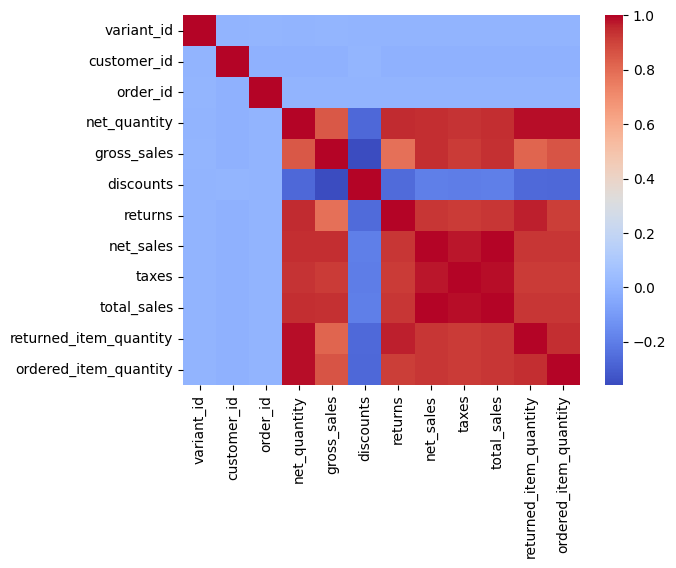

In [ ]:
  sn.heatmap(num_df.corr(),cmap='coolwarm')

In [ ]:
num_df.corr()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
variant_id,1.000000,0.002273,0.003660,-0.000815,0.002965,-0.001196,-0.002031,0.000654,0.001243,0.000754,-0.001137,-0.000480
customer_id,0.002273,1.000000,-0.010884,-0.012454,-0.011607,0.004380,-0.009460,-0.011062,-0.010793,-0.011051,-0.011670,-0.012870
order_id,0.003660,-0.010884,1.000000,0.000703,0.000509,0.000469,0.001145,0.000939,0.000898,0.000935,0.001948,-0.000523
net_quantity,-0.000815,-0.012454,0.000703,1.000000,0.849313,-0.270406,0.950192,0.942218,0.931455,0.943278,0.985537,0.986413
gross_sales,0.002965,-0.011607,0.000509,0.849313,1.000000,-0.358470,0.785843,0.941708,0.915405,0.940180,0.815116,0.859018
discounts,-0.001196,0.004380,0.000469,-0.270406,-0.358470,1.000000,-0.258355,-0.195524,-0.200613,-0.196962,-0.264847,-0.268331
returns,-0.002031,-0.009460,0.001145,0.950192,0.785843,-0.258355,1.000000,0.929249,0.919248,0.930397,0.963936,0.910634
net_sales,0.000654,-0.011062,0.000939,0.942218,0.941708,-0.195524,0.929249,1.000000,0.978233,0.999403,0.928733,0.929279
taxes,0.001243,-0.010793,0.000898,0.931455,0.915405,-0.200613,0.919248,0.978233,1.000000,0.984816,0.920032,0.916813
total_sales,0.000754,-0.011051,0.000935,0.943278,0.940180,-0.196962,0.930397,0.999403,0.984816,1.000000,0.930096,0.930016


In [ ]:
num_df.var()

variant_id                1.810594e+25
customer_id               3.872878e+25
order_id                  6.695865e+26
net_quantity              5.468621e-01
gross_sales               1.011294e+03
discounts                 6.036972e+01
returns                   6.327653e+02
net_sales                 2.683555e+03
taxes                     1.061993e+02
total_sales               3.834207e+03
returned_item_quantity    1.363032e-01
ordered_item_quantity     1.450255e-01
dtype: float64

In [ ]:
condition = (df['net_quantity'] < 0)


In [ ]:
clean_df=df[~condition]

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59336 entries, 0 to 59341
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           59336 non-null  object 
 1   product_type            59336 non-null  object 
 2   variant_title           59336 non-null  object 
 3   variant_sku             59336 non-null  object 
 4   variant_id              59336 non-null  float64
 5   customer_id             59336 non-null  float64
 6   order_id                59336 non-null  float64
 7   day                     59336 non-null  object 
 8   net_quantity            59336 non-null  int64  
 9   gross_sales             59336 non-null  float64
 10  discounts               59336 non-null  float64
 11  returns                 59336 non-null  float64
 12  net_sales               59336 non-null  float64
 13  taxes                   59336 non-null  float64
 14  total_sales             59336 non-null  flo

In [ ]:
clean_imp=clean_df.iloc[:,[8,10,12]]

In [ ]:
clean_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59336 entries, 0 to 59341
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   net_quantity  59336 non-null  int64  
 1   discounts     59336 non-null  float64
 2   net_sales     59336 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.8 MB


<Axes: >

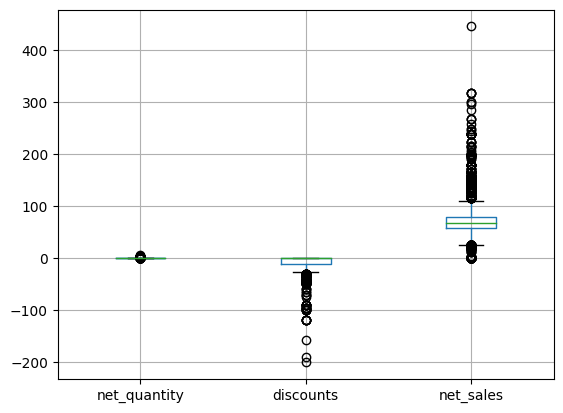

In [ ]:
clean_imp.boxplot()

In [ ]:
pip install feature_engine


In [ ]:
import pandas as pd
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='left', fold=1.5, variables=['discounts'])
clean_imp = winsorizer.fit_transform(clean_imp)


In [ ]:
import pandas as pd
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='gaussian', tail='both', fold=1.5, variables=['net_quantity'])
clean_imp = winsorizer.fit_transform(clean_imp)


In [ ]:
import pandas as pd
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['net_sales'])
clean_imp = winsorizer.fit_transform(clean_imp)


<Axes: >

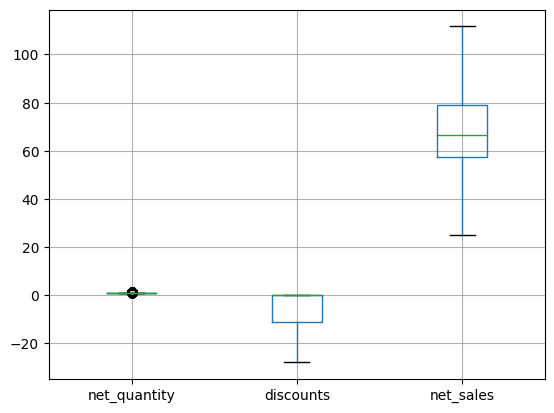

In [ ]:
clean_imp.boxplot()

In [ ]:
cols= list(clean_imp.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(clean_imp)

scaled_data = scaler.transform(clean_imp)


In [ ]:
scaled_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
df_pipelined = pd.DataFrame(scaled_data, columns = cols, index = clean_imp.index)

In [ ]:
df_pipelined.head(10)

,net_quantity,discounts,net_sales
0,1.000000,0.0,0.0
1,1.000000,0.0,0.0
2,0.000000,0.0,0.0
3,0.470967,0.0,0.0
4,0.470967,0.0,0.0
5,0.470967,0.0,0.0
6,0.470967,0.0,0.0
7,0.470967,0.0,0.0
8,0.470967,0.0,0.0
9,0.470967,0.0,0.0


Model building

In [ ]:
from sklearn.cluster import KMeans,DBSCAN
TWSS = []
k = list(range(165, 172))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_pipelined)
    TWSS.append(kmeans.inertia_)

TWSS


[0.8932164685771761,
 0.93069617896391,
 0.86741484909658,
 0.850072376897148,
 0.8903081917211805,
 0.8145685511681802,
 0.8009540987906519]

Text(0, 0.5, 'total_within_SS')

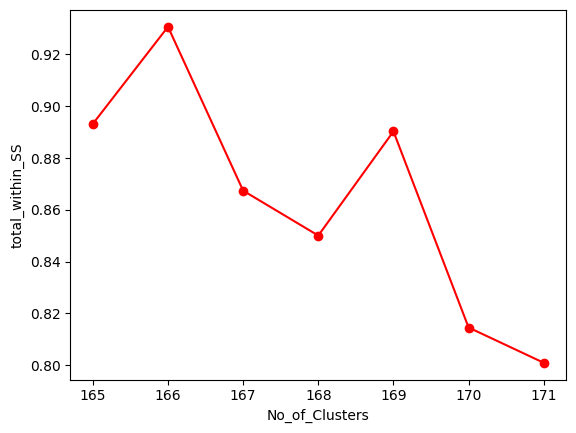

In [ ]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

In [ ]:
df_pipelined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59336 entries, 0 to 59341
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   net_quantity  59336 non-null  float64
 1   discounts     59336 non-null  float64
 2   net_sales     59336 non-null  float64
dtypes: float64(3)
memory usage: 1.8 MB


In [ ]:
kmeans = KMeans(n_clusters = 165)
kmeans.fit(df_pipelined)
kmeans.inertia_

0.8943178224485212

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_pipelined, kmeans.labels_)
score

0.9703291187014045

In [ ]:
db = DBSCAN(eps = 0.2, min_samples = 500)
db_clusters = db.fit_predict(df_pipelined)
print("DBSCAN Clustering: ", silhouette_score(df_pipelined, db_clusters))

DBSCAN Clustering:  0.5220474223098943
